# Handling Imbalanced Data in Customer Churn Prediction

- Credit card fraud detection, cancer prediction, customer churn prediction are some of the examples where you might get an imbalanced dataset.
- Training a model on imbalanced dataset requires making certain adjustments otherwise the model will not perform as per your expectations.
- Customer churn prediction is to measure why customers are leaving a business.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3565,4317-VTEOA,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.75,50.75,Yes
1133,3156-QLHBO,Male,0,No,Yes,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,48.35,No
1783,8380-PEFPE,Male,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.65,71.65,Yes
6201,6458-CYIDZ,Female,1,No,No,5,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,80.70,374.8,No
2787,9838-BFCQT,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,1851.45,No


### Data Exploration

In [3]:
df.drop("customerID", axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\suman\AppData\Local\Temp\ipykernel_14036\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

In [15]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Data Visualization

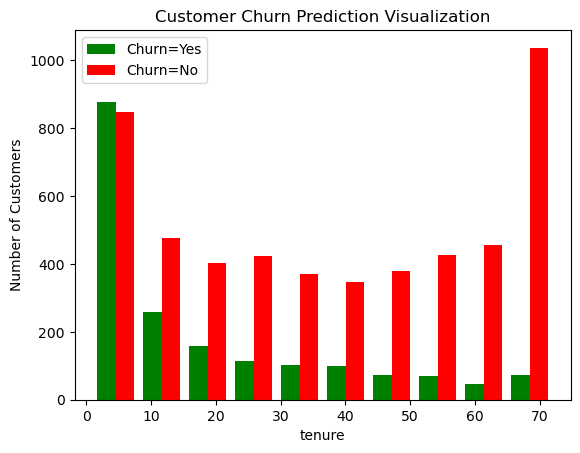

In [16]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

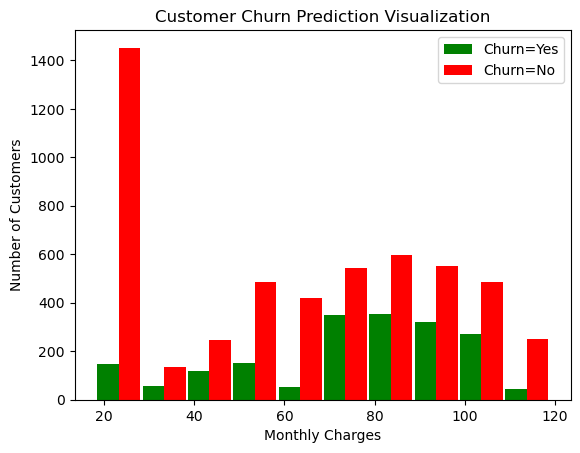

In [17]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [18]:
for col in df:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [19]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f"{column} : {df[column].unique()}")

In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\suman\AppData\Local\Temp\ipykernel_14036\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\suman\AppData\Local\Temp\ipykernel_14036\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\suman\AppData\Local\Temp\ipykernel_14036\1579841066.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0}, inplace=True)
C:\Users\suman\AppData\Local\Temp\ipykernel_14036\1579841066.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':

In [24]:
for col in df1:
    print(f"{col}: {df1[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\suman\AppData\Local\Temp\ipykernel_14036\3951318906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)
C:\Users\suman\AppData\Local\Temp\ipykernel_14036\3951318906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].

In [26]:
df1.gender.unique()

array([1, 0], dtype=int64)

### One hot encoding for categorical columns

In [27]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [29]:
# Now Ensure that dtypes of all columns of df2 is either 'int' or 'float'
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [30]:
# Convert all boolean columns to integers
df2 = df2.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df2.dtypes

C:\Users\suman\AppData\Local\Temp\ipykernel_14036\3117362496.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: int(x) if isinstance(x, bool) else x)


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

### Preprocessing/Scaling

In [31]:
# Columns to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6679,1,0,1,0,0.830986,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
638,0,1,1,1,0.774648,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
721,0,0,1,1,0.845070,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3786,0,0,1,1,0.366197,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2660,0,0,0,1,0.169014,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [34]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [35]:
X_train.shape, y_train.shape

((5625, 26), (5625,))

In [36]:
X_test.shape, y_test.shape

((1407, 26), (1407,))

### Building an ANN model in tensorflow/keras

In [38]:
!pip install tensorflow_addons

   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/719.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/719.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/719.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/719.8 kB ? eta -:--:--
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/719.8 kB 353.1 kB/s eta 0:00:02
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.2.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from tensorflow_addons import losses

C:\Users\suman\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.4905 - accuracy: 0.7586
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7957
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8055
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8105
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8107
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4033 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.8368
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8373
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8361
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8340
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8363
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8375
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8359
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8350
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8348
Epoch 90/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 

## Mitigating Skewness of Data

### Method 1: Undersampling

In [48]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [50]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [51]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [53]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6086 - accuracy: 0.6963
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7629
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7759
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8217
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8187
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8231
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8167
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8211
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8224
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8227
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8181
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.8214
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8174
Epoch 93/100


Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score.

### Method 2: Oversampling

In [54]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [55]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [56]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [57]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5582 - accuracy: 0.7133
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4932 - accuracy: 0.7610
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.7650
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4804 - accuracy: 0.7688
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7719
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4724 - accuracy: 0.7729
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.7809
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4652 - accuracy: 0.7768
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4635 - accuracy: 0.7771
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4588 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8298
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3821 - accuracy: 0.8276
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3813 - accuracy: 0.8327
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3818 - accuracy: 0.8287
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8321
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8312
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8289
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.8321
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8328
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method 3: SMOTE

In [58]:
!pip install imbalanced-learn

In [60]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [63]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [65]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [66]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5434 - accuracy: 0.7306
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.7752
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4661 - accuracy: 0.7740
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4622 - accuracy: 0.7799
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.7811
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.7884
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4481 - accuracy: 0.7878
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.7935
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.7926
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4365 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8485
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3479 - accuracy: 0.8478
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8478
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8510
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8502
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8487
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3416 - accuracy: 0.8512
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8500
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8506
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3401 - accuracy: 

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80.

### Method 4: Use of Ensemble with undersampling

In [67]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [68]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [70]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

##### Ensemble Example

- model1 --> class1(1495) + class0(0, 1495)

- model2 --> class1(1495) + class0(1496, 2990)

- model3 --> class1(1495) + class0(2990, 4130)

In [71]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [72]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [73]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [75]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [76]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6681 - accuracy: 0.6288
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7599
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7696
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8140
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8124
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8144
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8134
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8147
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8184
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8181
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8174
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8127
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8144
Epoch 93/100


In [77]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1496, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6474 - accuracy: 0.6480
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7491
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7628
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4947 - accuracy: 0.7628
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7675
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7648
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7655
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7658
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7641
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7715
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8193
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8183
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8133
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8163
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8177
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8230
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.8183
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8200
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8173
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8213
Epoch 93/100


In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 2s 3ms/step - loss: 0.6080 - accuracy: 0.6660
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.7552
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7651
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.7708
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4775 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.7772
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7803
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7780
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7799
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8323
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8349
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8307
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8345
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8342
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8361
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3648 - accuracy: 0.8353
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3641 - accuracy: 0.8345
Epoch 91/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8361
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8380
Epoch 93/100


In [80]:
len(y_pred1), len(y_pred2), len(y_pred3)

(1407, 1407, 1407)

In [81]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [82]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes.